# Phase 4 NLP ML Project


![Image Description](Image/Twitter1.png)

# Activate Env

In [1]:
conda activate TFgpu


Note: you may need to restart the kernel to use updated packages.


# Load Python Packages & DF

In [2]:
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import string
import re
import unicodedata
from collections import Counter
from wordcloud import WordCloud
from afinn import Afinn
from nltk.corpus import sentiwordnet as swn
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.tokenize import regexp_tokenize, word_tokenize, RegexpTokenizer, sent_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import FunctionTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.svm import LinearSVC, SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.dummy import DummyClassifier
from tensorflow.keras.preprocessing.text import Tokenizer
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_auc_score, roc_curve

In [3]:
# Read the dataset
df = pd.read_csv('judge-1377884607_tweet_product_company.csv', encoding='latin1')

# Remove tweets with unknown sentiment
df = df[df['is_there_an_emotion_directed_at_a_brand_or_product'] != "I can't tell"]

In [13]:
# import pandas as pd
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.pipeline import Pipeline
# from sklearn.dummy import DummyClassifier
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import FunctionTransformer
# from nltk.corpus import stopwords
# from nltk.stem import WordNetLemmatizer
# from nltk import pos_tag
# from nltk.corpus import wordnet
# from nltk.tokenize import RegexpTokenizer

# # Read the dataset
# df = pd.read_csv('judge-1377884607_tweet_product_company.csv', encoding='latin1')

# # Remove tweets with unknown sentiment
# df = df[df['is_there_an_emotion_directed_at_a_brand_or_product'] != "I can't tell"]

# def get_wordnet_pos(treebank_tag):
# '''
# Translate nltk POS to wordnet tags
# '''
# if treebank_tag.startswith('J'):
#     return wordnet.ADJ
# elif treebank_tag.startswith('V'):
#     return wordnet.VERB
# elif treebank_tag.startswith('N'):
#     return wordnet.NOUN
# elif treebank_tag.startswith('R'):
#     return wordnet.ADV
# else:
#     return wordnet.NOUN

# def clean_text(text_list, tokenizer, stopwords_list):
# '''
# Takes in a list of strings, a tokenizer, and a list of stopwords and
# returns a list lowercased, tokenized, removes stopwords,
# and lemmatizes the words. 
# '''
# # lowercase
# lower = [str(text).lower() for text in text_list]

# # tokenize
# tokenized = [tokenizer.tokenize(tweet) for tweet in lower]

# # stopwords
# no_stops = []
# for item in tokenized:
#     temp = []
#     for token in item:
#         if token not in stopwords_list:
#             temp.append(token)
#     no_stops.append(temp)  

# # preparation for lemmatization
# tags = [pos_tag(tokens) for tokens in no_stops]

# better_tags = []
# for item in tags:
#     temp1 = []
#     for word in item:
#         temp1.append((word[0], get_wordnet_pos(word[1])))
#     better_tags.append(temp1)

# # Lemmatization
# lemmatizer = WordNetLemmatizer()

# lem = []
# for item in better_tags:
#     temp2 = []
#     for word in item:
#         temp2.append(lemmatizer.lemmatize(word[0], word[1]))
#     lem.append(temp2)

# preprocessed = [' '.join(i) for i in lem]

# return preprocessed    

# # Load and preprocess the data
# X = df['tweet_text']
# y = df['is_there_an_emotion_directed_at_a_brand_or_product']

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Create the TfidfVectorizer with max_df
# max_df = 0.9  # Exclude terms that have a document frequency higher than 90%
# vectorizer = TfidfVectorizer(max_df=max_df)

# # Create the tokenizer and stopwords list
# tokenizer = RegexpTokenizer(r'\w+')
# stopwords_list = stopwords.words('english')

# # Create the pipeline
# pipeline = Pipeline([
# ('preprocessor', FunctionTransformer(clean_text, kw_args={'tokenizer': tokenizer, 'stopwords_list': stopwords_list})),
# ('tfidf', TfidfVectorizer()),
# ('classifier', DummyClassifier(strategy='most_frequent'))
# ])

# # Train the model and make predictions
# pipeline.fit(X_train, y_train)
# y_pred = pipeline.predict(X_test)

# # Calculate evaluation metrics
# accuracy = accuracy_score(y_test, y_pred)
# precision = precision_score(y_test, y_pred, average='weighted', zero_division=1.0)
# recall = recall_score(y_test, y_pred, average='weighted', zero_division=1.0)
# f1 = f1_score(y_test, y_pred, average='weighted', zero_division=1.0)

# # Print the evaluation metrics
# print(f'DummyClassifier Accuracy: {accuracy}')
# print(f'DummyClassifier Precision: {precision}')
# print(f'DummyClassifier Recall: {recall}')
# print(f'DummyClassifier F1-score: {f1}')


DummyClassifier Accuracy: 0.6124161073825504
DummyClassifier Precision: 0.7626373811990451
DummyClassifier Recall: 0.6124161073825504
DummyClassifier F1-score: 0.4652068245465783


In [43]:
# import pandas as pd
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.pipeline import Pipeline
# from sklearn.dummy import DummyClassifier
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import FunctionTransformer
# from nltk.corpus import stopwords
# from nltk.stem import WordNetLemmatizer
# from nltk import pos_tag
# from nltk.corpus import wordnet
# from nltk.tokenize import RegexpTokenizer


# def get_wordnet_pos(treebank_tag):
#     '''
#     Translate nltk POS to wordnet tags
#     '''
#     if treebank_tag.startswith('J'):
#         return wordnet.ADJ
#     elif treebank_tag.startswith('V'):
#         return wordnet.VERB
#     elif treebank_tag.startswith('N'):
#         return wordnet.NOUN
#     elif treebank_tag.startswith('R'):
#         return wordnet.ADV
#     else:
#         return wordnet.NOUN


# def clean_text(text_list, tokenizer, stopwords_list):
#     '''
#     Takes in a list of strings, a tokenizer, and a list of stopwords and
#     returns a list lowercased, tokenized, removes stopwords,
#     and lemmatizes the words.
#     '''
#     # lowercase
#     lower = [str(text).lower() for text in text_list]

#     # tokenize
#     tokenized = [tokenizer.tokenize(tweet) for tweet in lower]

#     # stopwords
#     no_stops = []
#     for item in tokenized:
#         temp = []
#         for token in item:
#             # Add condition to exclude specific words
#             if token not in stopwords_list and token not in ['sxsw', 'user', 'link','mention', 'rt']:
#                 temp.append(token)
#         no_stops.append(temp)

#     # preparation for lemmatization
#     tags = [pos_tag(tokens) for tokens in no_stops]

#     better_tags = []
#     for item in tags:
#         temp1 = []
#         for word in item:
#             temp1.append((word[0], get_wordnet_pos(word[1])))
#         better_tags.append(temp1)

#     # Lemmatization
#     lemmatizer = WordNetLemmatizer()

#     lem = []
#     for item in better_tags:
#         temp2 = []
#         for word in item:
#             temp2.append(lemmatizer.lemmatize(word[0], word[1]))
#         lem.append(temp2)

#     preprocessed = [' '.join(i) for i in lem]

#     return preprocessed


# # Read the dataset
# df = pd.read_csv('judge-1377884607_tweet_product_company.csv', encoding='latin1')

# # Remove tweets with unknown sentiment
# df = df[df['is_there_an_emotion_directed_at_a_brand_or_product'] != "I can't tell"]

# # Load and preprocess the data
# X = df['tweet_text']
# y = df['is_there_an_emotion_directed_at_a_brand_or_product']

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Create the tokenizer and stopwords list
# tokenizer = RegexpTokenizer(r'\w+')
# stopwords_list = stopwords.words('english')

# # Create the pipeline
# pipeline = Pipeline([
#     ('preprocessor', FunctionTransformer(clean_text, kw_args={'tokenizer': tokenizer, 'stopwords_list': stopwords_list})),
#     ('tfidf', TfidfVectorizer()),
#     ('classifier', DummyClassifier(strategy='most_frequent'))
# ])

# # Train the model and make predictions
# pipeline.fit(X_train, y_train)
# y_pred = pipeline.predict(X_test)

# # Calculate evaluation metrics
# accuracy = accuracy_score(y_test, y_pred)
# precision = precision_score(y_test, y_pred, average='weighted', zero_division=1.0)
# recall = recall_score(y_test, y_pred, average='weighted', zero_division=1.0)
# f1 = f1_score(y_test, y_pred, average='weighted', zero_division=1.0)

# # Print the evaluation metrics
# print(f'DummyClassifier Accuracy: {accuracy}')
# print(f'DummyClassifier Precision: {precision}')
# print(f'DummyClassifier Recall: {recall}')
# print(f'DummyClassifier F1-score: {f1}')


DummyClassifier Accuracy: 0.6124161073825504
DummyClassifier Precision: 0.7626373811990451
DummyClassifier Recall: 0.6124161073825504
DummyClassifier F1-score: 0.4652068245465783


In [54]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import FunctionTransformer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
from nltk.corpus import wordnet
from nltk.tokenize import TweetTokenizer


def get_wordnet_pos(treebank_tag):
    '''
    Translate nltk POS to wordnet tags
    '''
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN


def clean_text(text_list, tokenizer, stopwords_list):
    '''
    Takes in a list of strings, a tokenizer, and a list of stopwords and
    returns a list lowercased, tokenized, removes stopwords,
    and lemmatizes the words.
    '''
    # lowercase
    lower = [str(text).lower() for text in text_list]

    # tokenize
    tokenized = [tokenizer.tokenize(tweet) for tweet in lower]

    # stopwords
    no_stops = []
    for item in tokenized:
        temp = []
        for token in item:
            # Add condition to exclude specific words
            if token not in stopwords_list and token not in ['sxsw', 'user', 'link', 'mention', 'rt']:
                temp.append(token)
        no_stops.append(temp)

    # preparation for lemmatization
    tags = [pos_tag(tokens) for tokens in no_stops]

    better_tags = []
    for item in tags:
        temp1 = []
        for word in item:
            temp1.append((word[0], get_wordnet_pos(word[1])))
        better_tags.append(temp1)

    # Lemmatization
    lemmatizer = WordNetLemmatizer()

    lem = []
    for item in better_tags:
        temp2 = []
        for word in item:
            temp2.append(lemmatizer.lemmatize(word[0], word[1]))
        lem.append(temp2)

    preprocessed = [' '.join(i) for i in lem]

    return preprocessed


# Read the dataset
df = pd.read_csv('judge-1377884607_tweet_product_company.csv', encoding='latin1')

# Remove tweets with unknown sentiment
df = df[df['is_there_an_emotion_directed_at_a_brand_or_product'] != "I can't tell"]

# Load and preprocess the data
X = df['tweet_text']
y = df['is_there_an_emotion_directed_at_a_brand_or_product']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the tokenizer and stopwords list
tokenizer = TweetTokenizer()
stopwords_list = stopwords.words('english')

# Create the pipeline
pipeline = Pipeline([
    ('preprocessor', FunctionTransformer(clean_text, kw_args={'tokenizer': tokenizer, 'stopwords_list': stopwords_list})),
    ('tfidf', TfidfVectorizer()),
    ('classifier', DummyClassifier(strategy='most_frequent'))
])

# Train the model and make predictions
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=1.0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=1.0)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=1.0)

# Print the evaluation metrics
print(f'DummyClassifier Accuracy: {accuracy}')
print(f'DummyClassifier Precision: {precision}')
print(f'DummyClassifier Recall: {recall}')
print(f'DummyClassifier F1-score: {f1}')


DummyClassifier Accuracy: 0.6124161073825504
DummyClassifier Precision: 0.7626373811990451
DummyClassifier Recall: 0.6124161073825504
DummyClassifier F1-score: 0.4652068245465783


In [55]:
from sklearn.metrics import classification_report

# Generate the classification report for the ensemble model
classification_report_ensemble = classification_report(y_test, y_pred, zero_division=0)

# Print the classification report for the ensemble model
print('Classification Report - Ensemble Model:')
print(classification_report_ensemble)


Classification Report - Ensemble Model:
                                    precision    recall  f1-score   support

                  Negative emotion       0.00      0.00      0.00       122
No emotion toward brand or product       0.61      1.00      0.76      1095
                  Positive emotion       0.00      0.00      0.00       571

                          accuracy                           0.61      1788
                         macro avg       0.20      0.33      0.25      1788
                      weighted avg       0.38      0.61      0.47      1788



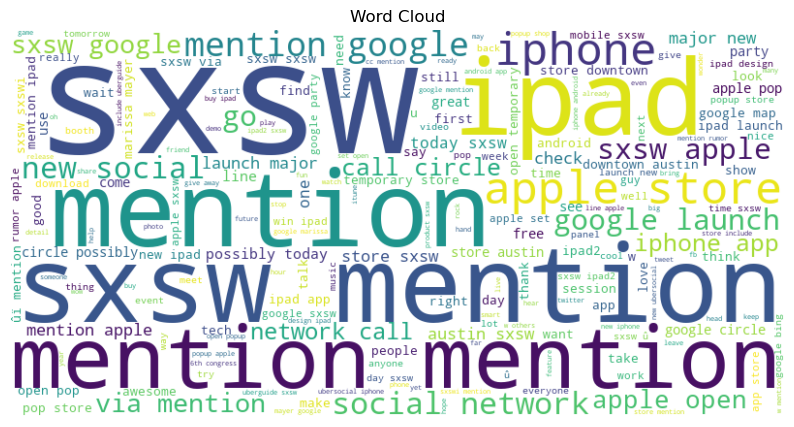

In [60]:
from wordcloud import WordCloud

# Join the preprocessed text for all tweets into a single string
text = ' '.join(preprocessed_text)

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud')
plt.show()


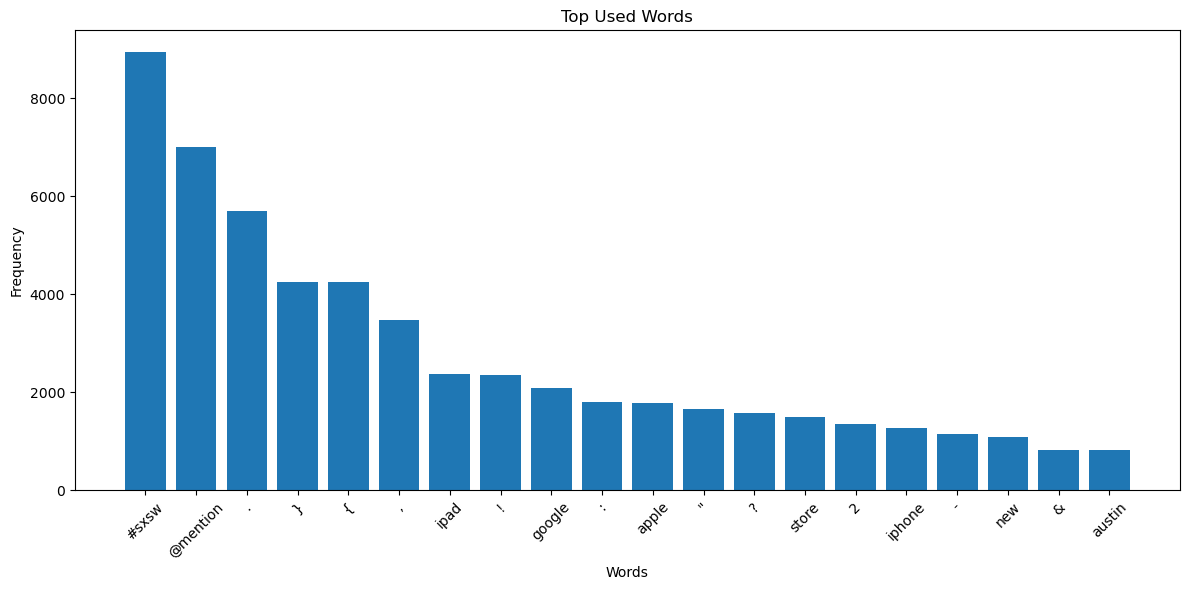

In [64]:
from collections import Counter
import matplotlib.pyplot as plt

# Concatenate all the preprocessed text into a single string
preprocessed_text = clean_text(X, tokenizer, stopwords_list)
text = ' '.join(preprocessed_text)

# Tokenize the text
tokens = tokenizer.tokenize(text)

# Count the frequency of each word
word_counts = Counter(tokens)

# Get the top N most common words and their frequencies
top_words = word_counts.most_common(20)  # Replace N with the desired number of top words

# Extract the words and frequencies
words, frequencies = zip(*top_words)

# Plot the bar chart
plt.figure(figsize=(12, 6))
plt.bar(words, frequencies)
plt.xticks(rotation=45)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top Used Words')
plt.tight_layout()
plt.show()


In [65]:
from collections import Counter

# Concatenate all the preprocessed text into a single string
preprocessed_text = clean_text(X, tokenizer, stopwords_list)
text = ' '.join(preprocessed_text)

# Tokenize the text
tokens = text.split()

# Count the frequency of each word
word_counts = Counter(tokens)

# Get the top N most common words and their frequencies
top_words = word_counts.most_common(20)  # Replace N with the desired number of top words

# Print the top list of words
for word, frequency in top_words:
    print(f'{word}: {frequency}')


#sxsw: 8938
@mention: 7006
.: 5782
}: 4250
{: 4247
,: 3471
ipad: 2370
!: 2345
google: 2098
:: 1799
apple: 1784
": 1657
?: 1574
store: 1495
2: 1353
iphone: 1279
-: 1152
new: 1085
&: 834
austin: 832


In [67]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import FunctionTransformer
from sklearn.ensemble import VotingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
from nltk.corpus import wordnet
from nltk.tokenize import RegexpTokenizer

# Read the dataset
df = pd.read_csv('judge-1377884607_tweet_product_company.csv', encoding='latin1')

# Remove tweets with unknown sentiment
df = df[df['is_there_an_emotion_directed_at_a_brand_or_product'] != "I can't tell"]

def get_wordnet_pos(treebank_tag):
    '''
    Translate nltk POS to wordnet tags
    '''
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
    
def clean_text(text_list, tokenizer, stopwords_list):
    '''
    Takes in a list of strings, a tokenizer, and a list of stopwords and
    returns a list lowercased, tokenized, removes stopwords,
    and lemmatizes the words. 
    '''
    # lowercase
    lower = [str(text).lower() for text in text_list]
    
    # tokenize
    tokenized = [tokenizer.tokenize(tweet) for tweet in lower]
    
    # stopwords
    no_stops = []
    for item in tokenized:
        temp = []
        for token in item:
            if token not in stopwords_list:
                temp.append(token)
        no_stops.append(temp)  
    
    # preparation for lemmatization
    tags = [pos_tag(tokens) for tokens in no_stops]
    
    better_tags = []
    for item in tags:
        temp1 = []
        for word in item:
            temp1.append((word[0], get_wordnet_pos(word[1])))
        better_tags.append(temp1)

    # Lemmatization
    lemmatizer = WordNetLemmatizer()

    lem = []
    for item in better_tags:
        temp2 = []
        for word in item:
            temp2.append(lemmatizer.lemmatize(word[0], word[1]))
        lem.append(temp2)
        
    preprocessed = [' '.join(i) for i in lem]
    
    return preprocessed    

# Load and preprocess the data
X = df['tweet_text']
y = df['is_there_an_emotion_directed_at_a_brand_or_product']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the tokenizer and stopwords list
tokenizer = RegexpTokenizer(r'\w+')
stopwords_list = stopwords.words('english')

# Clean the text data
X_train_cleaned = clean_text(X_train, tokenizer, stopwords_list)
X_test_cleaned = clean_text(X_test, tokenizer, stopwords_list)

# Create the pipeline for text preprocessing and feature extraction
preprocessor = TfidfVectorizer()

# Fit and transform the cleaned text data using the preprocessor
X_train_preprocessed = preprocessor.fit_transform(X_train_cleaned)
X_test_preprocessed = preprocessor.transform(X_test_cleaned)

# Define the individual models
model1 = MultinomialNB(alpha=0.1)
model2 = SVC(kernel='linear', probability=True)
model3 = RandomForestClassifier(n_estimators=100)

# Create the voting classifier
voting_classifier = VotingClassifier(
    estimators=[('nb', model1), ('svm', model2), ('rf', model3)],
    voting='soft'  # Use soft voting for probability-based prediction averaging
)

# Train the ensemble model
voting_classifier.fit(X_train_preprocessed, y_train)

# Make predictions using the ensemble model
y_pred = voting_classifier.predict(X_test_preprocessed)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=1.0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=1.0)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=1.0)

# Print the evaluation metrics
print(f'Ensemble Accuracy: {accuracy}')
print(f'Ensemble Precision: {precision}')
print(f'Ensemble Recall: {recall}')
print(f'Ensemble F1-score: {f1}')


Ensemble Accuracy: 0.6957494407158836
Ensemble Precision: 0.6820298164168257
Ensemble Recall: 0.6957494407158836
Ensemble F1-score: 0.6760221226216437


In [49]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import FunctionTransformer
from sklearn.ensemble import VotingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
from nltk.corpus import wordnet
from nltk.tokenize import RegexpTokenizer

# Read the dataset
df = pd.read_csv('judge-1377884607_tweet_product_company.csv', encoding='latin1')

# Remove tweets with unknown sentiment
df = df[df['is_there_an_emotion_directed_at_a_brand_or_product'] != "I can't tell"]

def get_wordnet_pos(treebank_tag):
    '''
    Translate nltk POS to wordnet tags
    '''
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
    
def clean_text(text_list, tokenizer, stopwords_list):
    '''
    Takes in a list of strings, a tokenizer, and a list of stopwords and
    returns a list lowercased, tokenized, removes stopwords,
    and lemmatizes the words. 
    '''
    # lowercase
    lower = [str(text).lower() for text in text_list]
    
    # tokenize
    tokenized = [tokenizer.tokenize(tweet) for tweet in lower]
    
    # stopwords
    no_stops = []
    for item in tokenized:
        temp = []
        for token in item:
            if token not in stopwords_list:
                temp.append(token)
        no_stops.append(temp)  
    
    # preparation for lemmatization
    tags = [pos_tag(tokens) for tokens in no_stops]
    
    better_tags = []
    for item in tags:
        temp1 = []
        for word in item:
            temp1.append((word[0], get_wordnet_pos(word[1])))
        better_tags.append(temp1)

    # Lemmatization
    lemmatizer = WordNetLemmatizer()

    lem = []
    for item in better_tags:
        temp2 = []
        for word in item:
            temp2.append(lemmatizer.lemmatize(word[0], word[1]))
        lem.append(temp2)
        
    preprocessed = [' '.join(i) for i in lem]
    
    return preprocessed    

# Load and preprocess the data
X = df['tweet_text']
y = df['is_there_an_emotion_directed_at_a_brand_or_product']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the tokenizer and stopwords list
tokenizer = RegexpTokenizer(r'\w+')
stopwords_list = stopwords.words('english')

# Clean the text data
X_train_cleaned = clean_text(X_train, tokenizer, stopwords_list)
X_test_cleaned = clean_text(X_test, tokenizer, stopwords_list)

# Create the pipeline for text preprocessing and feature extraction
preprocessor = TfidfVectorizer()

# Fit and transform the cleaned text data using the preprocessor
X_train_preprocessed = preprocessor.fit_transform(X_train_cleaned)
X_test_preprocessed = preprocessor.transform(X_test_cleaned)

# Define the individual models
model1 = MultinomialNB(alpha=0.1)
model2 = SVC(kernel='linear', probability=True)
model3 = RandomForestClassifier(n_estimators=100)

# Create the voting classifier
voting_classifier = VotingClassifier(
    estimators=[('nb', model1), ('svm', model2), ('rf', model3)],
    voting='soft'  # Use soft voting for probability-based prediction averaging
)

# Train the ensemble model
voting_classifier.fit(X_train_preprocessed, y_train)

# Make predictions using the ensemble model
y_pred = voting_classifier.predict(X_test_preprocessed)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=1.0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=1.0)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=1.0)

# Print the evaluation metrics
print(f'Ensemble Accuracy: {accuracy}')
print(f'Ensemble Precision: {precision}')
print(f'Ensemble Recall: {recall}')
print(f'Ensemble F1-score: {f1}')


Ensemble Accuracy: 0.6923937360178971
Ensemble Precision: 0.6790773893171917
Ensemble Recall: 0.6923937360178971
Ensemble F1-score: 0.6712596170789041


In [20]:
# Generate the classification report for the ensemble model
classification_report_ensemble = classification_report(y_test, y_pred)

# Print the classification report for the ensemble model
print('Classification Report - Ensemble Model:')
print(classification_report_ensemble)


Classification Report - Ensemble Model:
                                    precision    recall  f1-score   support

                  Negative emotion       0.55      0.19      0.28       122
No emotion toward brand or product       0.72      0.86      0.78      1095
                  Positive emotion       0.64      0.48      0.55       571

                          accuracy                           0.69      1788
                         macro avg       0.63      0.51      0.54      1788
                      weighted avg       0.68      0.69      0.67      1788



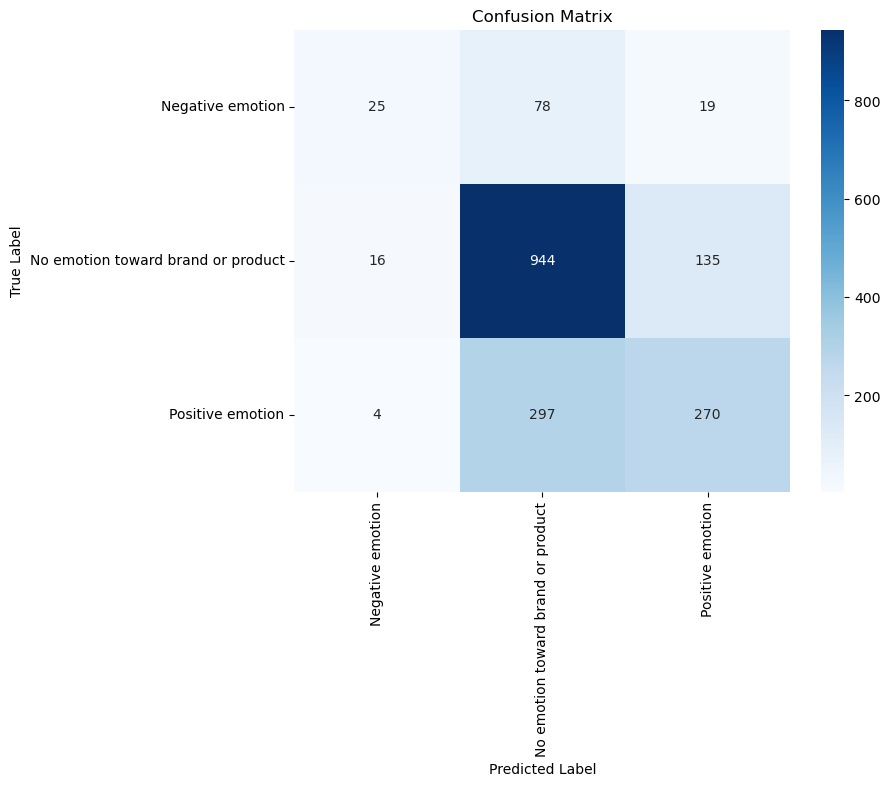

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Get the unique classes in the target variable
classes = np.unique(y_test)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


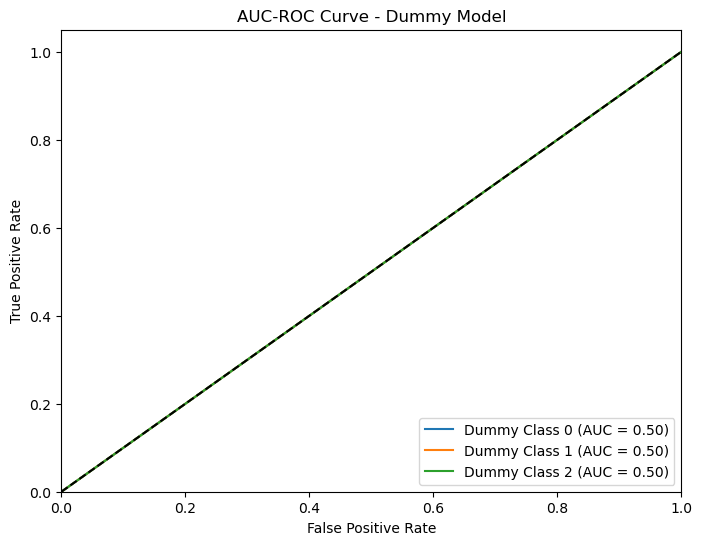

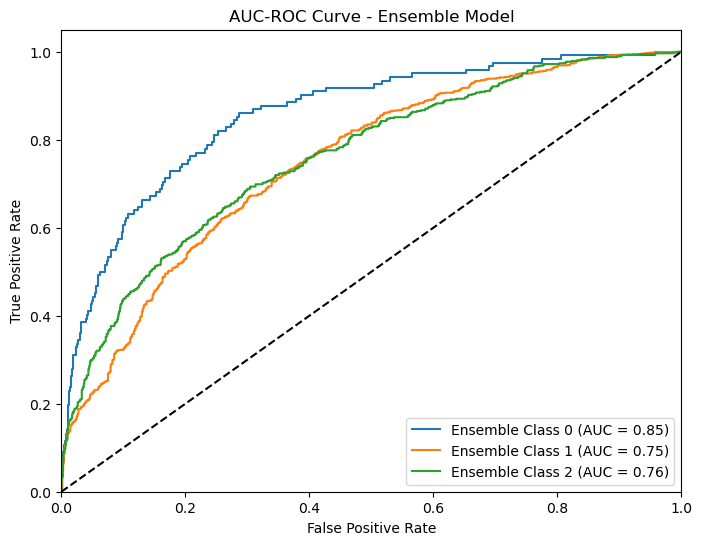

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

# Binarize the multiclass labels
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))

# Count the number of unique classes
n_classes = y_test_binarized.shape[1]

# Replace pipeline with your trained pipeline object
y_scores_dummy = pipeline.predict_proba(X_test_preprocessed)

# Compute the ROC curve and AUC for the dummy model (one-vs-rest for each class)
fpr_dummy = dict()
tpr_dummy = dict()
auc_dummy = dict()
for i in range(n_classes):
    fpr_dummy[i], tpr_dummy[i], _ = roc_curve(y_test_binarized[:, i], y_scores_dummy[:, i])
    auc_dummy[i] = auc(fpr_dummy[i], tpr_dummy[i])

# Plot the AUC-ROC curves for the dummy model
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr_dummy[i], tpr_dummy[i], label=f'Dummy Class {i} (AUC = {auc_dummy[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-ROC Curve - Dummy Model')
plt.legend(loc='lower right')
plt.show()

# Replace voting_classifier with your trained VotingClassifier object
y_scores_ensemble = voting_classifier.predict_proba(X_test_preprocessed)

# Compute the ROC curve and AUC for the ensemble model (one-vs-rest for each class)
fpr_ensemble = dict()
tpr_ensemble = dict()
auc_ensemble = dict()
for i in range(n_classes):
    fpr_ensemble[i], tpr_ensemble[i], _ = roc_curve(y_test_binarized[:, i], y_scores_ensemble[:, i])
    auc_ensemble[i] = auc(fpr_ensemble[i], tpr_ensemble[i])

# Plot the AUC-ROC curves for the ensemble model
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr_ensemble[i], tpr_ensemble[i], label=f'Ensemble Class {i} (AUC = {auc_ensemble[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-ROC Curve - Ensemble Model')
plt.legend(loc='lower right')
plt.show()


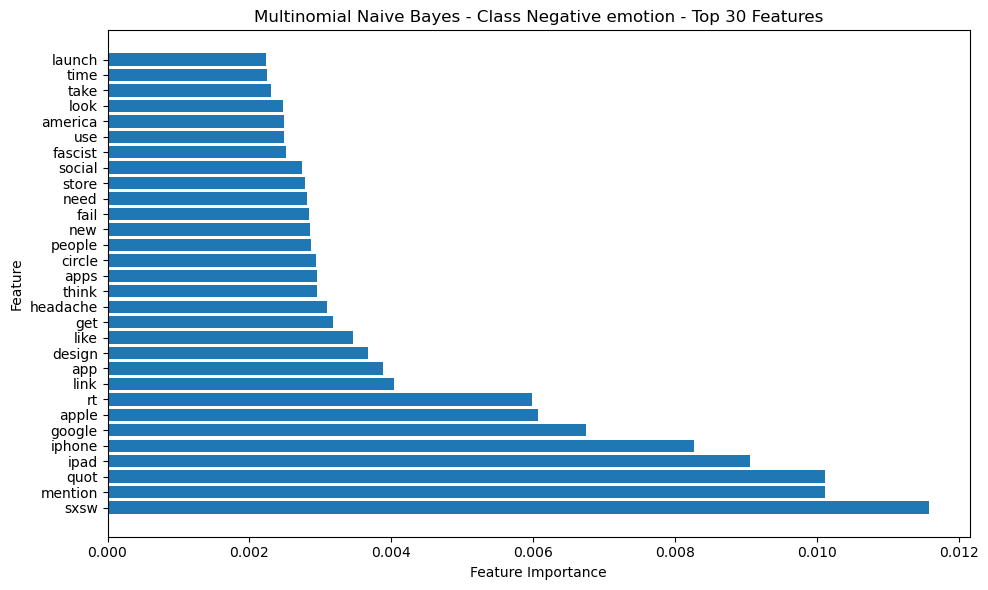

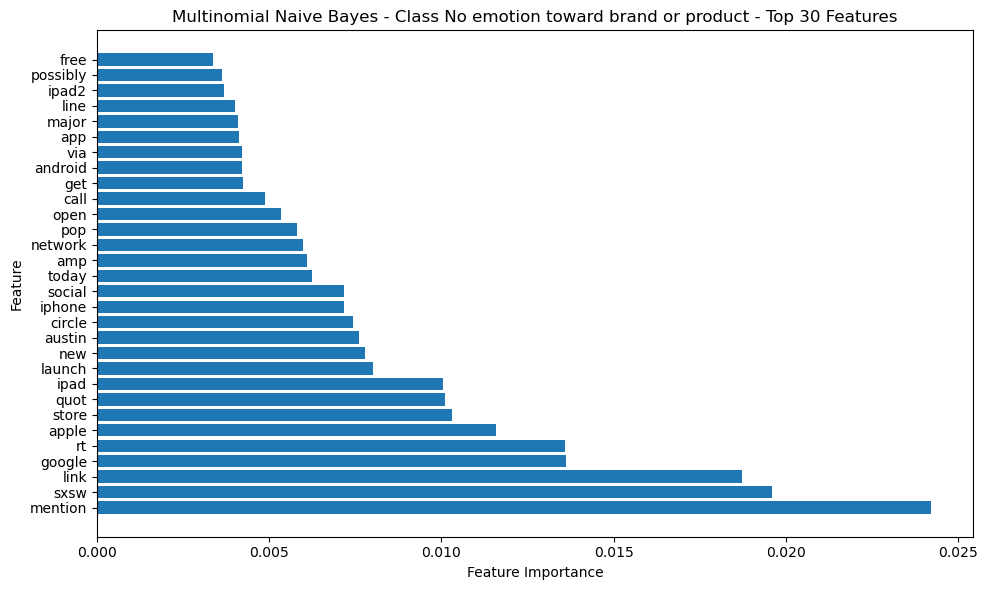

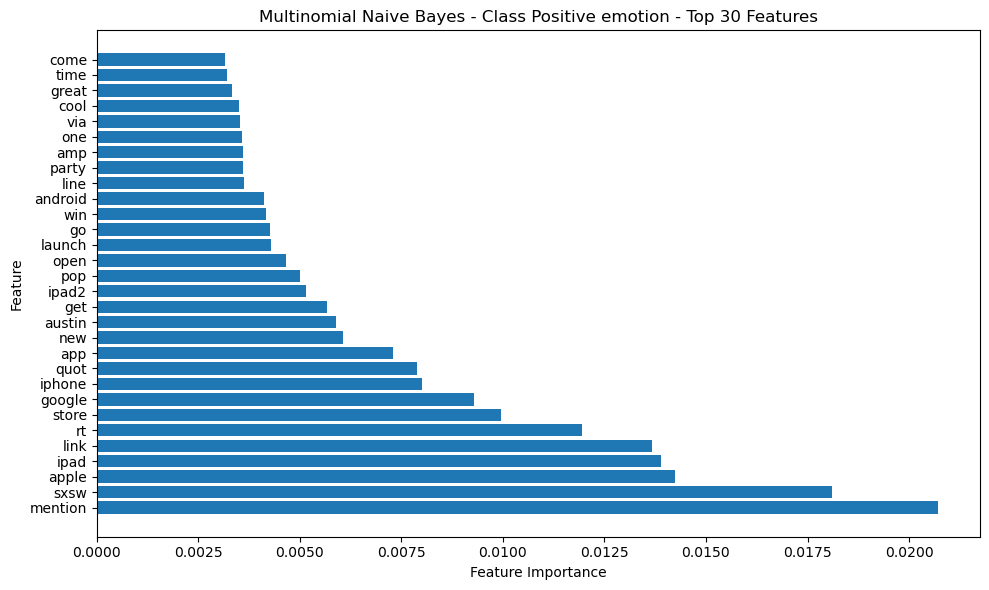

In [31]:
import numpy as np
import matplotlib.pyplot as plt

# Fit the Multinomial Naive Bayes model
model1.fit(X_train_preprocessed, y_train)

# Get the feature log probabilities for each class
feature_log_probs = model1.feature_log_prob_

# Calculate the exponential of the feature log probabilities
feature_probs = np.exp(feature_log_probs)

# Access the feature importance scores for each class
class_importances = feature_probs

# Define the feature names (assuming you're using TfidfVectorizer)
feature_names = preprocessor.get_feature_names_out()

top_n = 30  # Specify the number of top features to display

# Get the class names from the model
class_names = model1.classes_

# Create separate figures and axes for each class
figs = []
axes = []
for i in range(class_importances.shape[0]):
    fig, ax = plt.subplots(figsize=(10, 6))
    figs.append(fig)
    axes.append(ax)

    # Sort the features by importance
    class_importance_sorted = class_importances[i].argsort()[-top_n:][::-1]

    # Plot the top N features and their importances
    ax.barh(np.array(feature_names)[class_importance_sorted], class_importances[i][class_importance_sorted])

    # Customize the plot
    ax.set_xlabel('Feature Importance')
    ax.set_ylabel('Feature')
    ax.set_title(f'Multinomial Naive Bayes - Class {class_names[i]} - Top {top_n} Features')

    # Adjust the layout
    plt.tight_layout()

# Show the plots
plt.show()


# Model 2 Analysis - Supervised Machine Learning Algorithm

In [34]:
model2.fit(X_train_preprocessed, y_train)
coefficients = model2.coef_

In [35]:
coefficients

<3x7418 sparse matrix of type '<class 'numpy.float64'>'
	with 13922 stored elements in Compressed Sparse Row format>

In [36]:
# ABS Value below graph

In [37]:
top_n = 10  # Specify the number of top features to display

# Sort the features by the absolute magnitude of coefficients for each class
class_sorted_indices = np.argsort(np.abs(coefficients), axis=1)[:, -top_n:]

# Reverse the order of the sorted indices
class_sorted_indices = np.flip(class_sorted_indices, axis=1)

# Get the top N features and their corresponding coefficients
top_features = np.array(feature_names)[class_sorted_indices]
top_coefficients = np.take_along_axis(coefficients, class_sorted_indices, axis=1)

# Create the figure and axes
fig, ax = plt.subplots()

# Plot the top N features and their coefficients for each class
for i in range(coefficients.shape[0]):
    ax.barh(top_features[i], top_coefficients[i], label=f'Class {i}')

# Customize the plot
ax.set_xlabel('Coefficient Value')
ax.set_ylabel('Feature')
ax.set_title('Linear SVM - Top 10 Features')
ax.legend()

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()


ValueError: WRITEBACKIFCOPY base is read-only

In [38]:
import matplotlib.pyplot as plt

top_n = 30  # Specify the number of top features to display

# Sort the features by the absolute magnitude of coefficients for each class
class_sorted_indices = np.argsort(np.abs(coefficients), axis=1)[:, -top_n:]

# Reverse the order of the sorted indices
class_sorted_indices = np.flip(class_sorted_indices, axis=1)

# Get the top N features and their corresponding coefficients
top_features = np.array(feature_names)[class_sorted_indices]
top_coefficients = np.take_along_axis(coefficients, class_sorted_indices, axis=1)

# Get the class names
class_names = model1.classes_

# Get the number of classes
num_classes = coefficients.shape[0]

# Create separate figures and axes for each class
figs = []
axes = []
for i in range(num_classes):
    fig, ax = plt.subplots(figsize=(20, 12))
    figs.append(fig)
    axes.append(ax)

# Plot the top N features and their coefficients for each class
for i in range(num_classes):
    ax = axes[i]
    ax.barh(top_features[i], top_coefficients[i], label=f'Class {class_names[i]}')
    ax.set_xlabel('Coefficient Value', fontsize=30)  # Increase font size for x-axis label
    ax.set_ylabel('Feature', fontsize=20)  # Increase font size for y-axis label
    ax.set_title(f'Linear SVM - {class_names[i]} - Top {top_n} Features', fontsize=25)  # Increase font size for title
    ax.legend(fontsize=14)  # Increase font size for legend
    ax.tick_params(axis='both', labelsize=16)  # Increase font size for tick labels
    plt.tight_layout()

# Show the plots
plt.show()


ValueError: WRITEBACKIFCOPY base is read-only

# Model 3 Analysis - Random Forest Model

In [39]:
model3.fit(X_train_preprocessed, y_train)
importances = model3.feature_importances_

In [40]:
importances

array([3.97835628e-04, 3.22059873e-04, 2.33880592e-06, ...,
       2.24398297e-06, 4.50572458e-08, 6.22548638e-05])

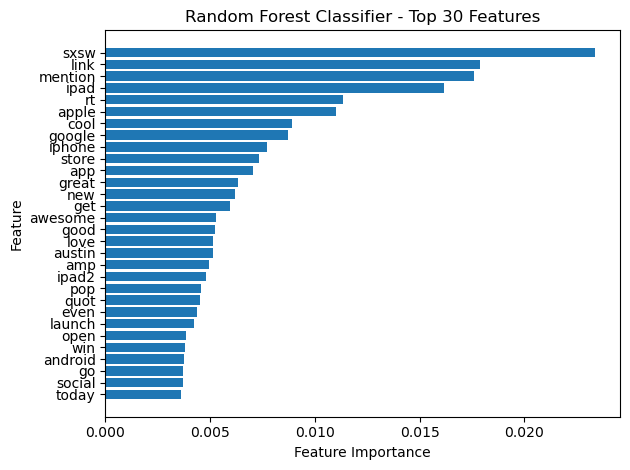

In [41]:
import matplotlib.pyplot as plt

# Fit the Random Forest Classifier model
model3.fit(X_train_preprocessed, y_train)

# Get the feature importances
importances = model3.feature_importances_

# Get the indices of features sorted by importance
sorted_indices = np.argsort(importances)

# Get the top N features and their importances
top_n = 30  # Specify the number of top features to display
top_features = feature_names[sorted_indices][-top_n:]
top_importances = importances[sorted_indices][-top_n:]

# Create the figure and axes
fig, ax = plt.subplots()

# Plot the top N features and their importances
ax.barh(top_features, top_importances)

# Customize the plot
ax.set_xlabel('Feature Importance')
ax.set_ylabel('Feature')
ax.set_title('Random Forest Classifier - Top 30 Features')

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()


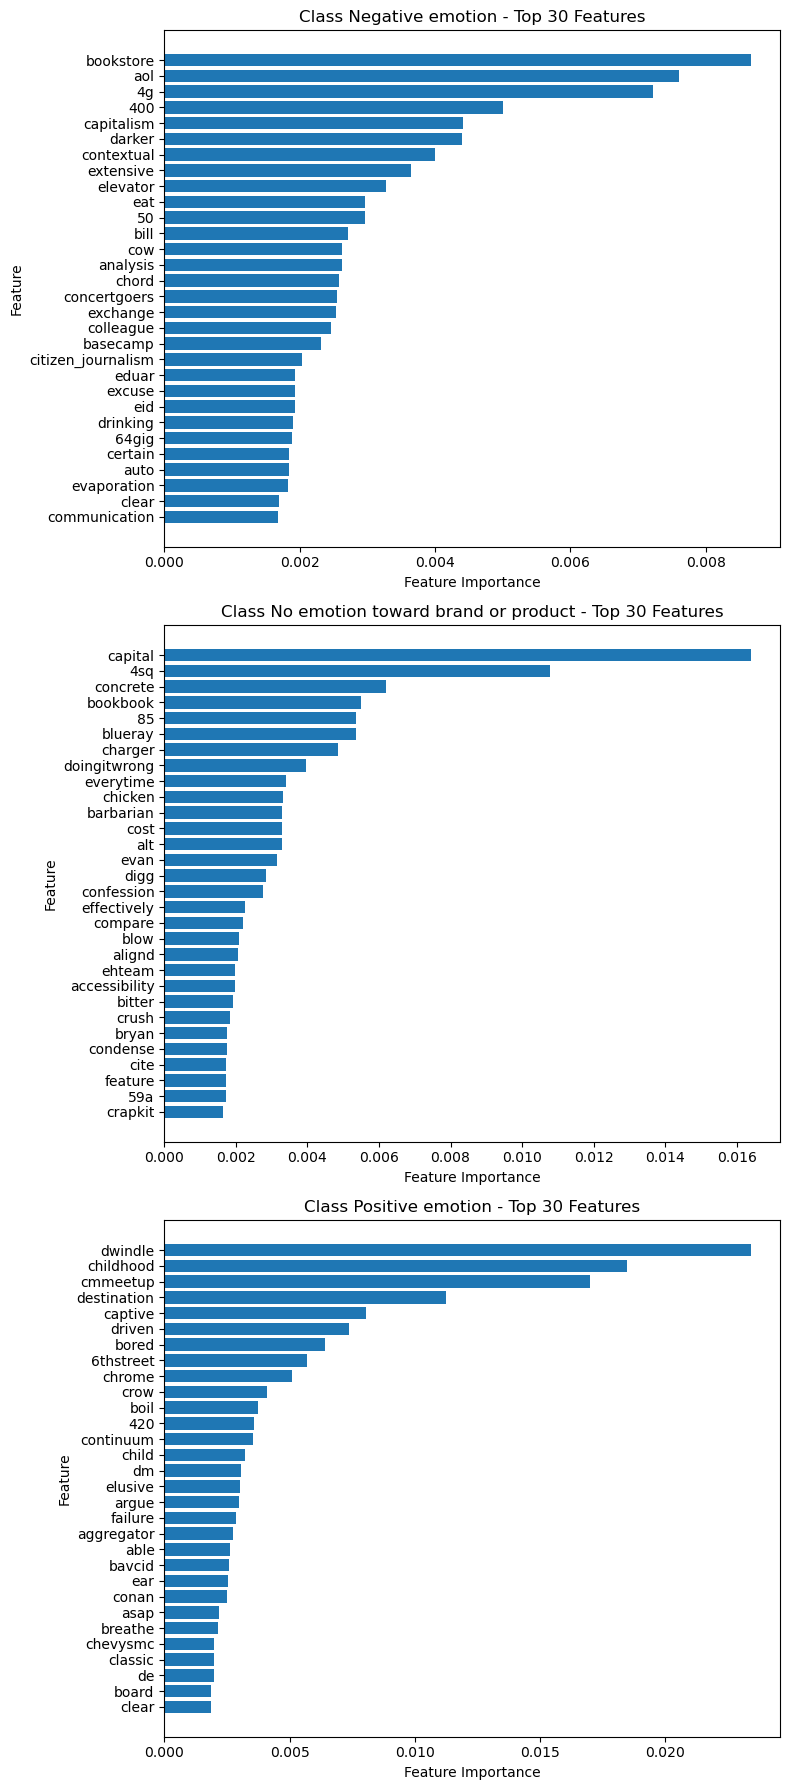

In [42]:
import matplotlib.pyplot as plt

# Fit the Random Forest Classifier model
model3.fit(X_train_preprocessed, y_train)

# Get the feature importances
importances = model3.feature_importances_

# Get the number of classes
num_classes = len(model3.classes_)

# Create a figure with subplots for each class
fig, axes = plt.subplots(nrows=num_classes, figsize=(8, 6 * num_classes))

# Iterate over each class
for i, class_label in enumerate(model3.classes_):
    # Get the feature importances for the current class
    class_importances = importances[i::num_classes]

    # Get the indices of features sorted by importance
    sorted_indices = np.argsort(class_importances)

    # Get the top N features and their importances
    top_n = 30  # Specify the number of top features to display
    top_features = feature_names[sorted_indices][-top_n:]
    top_importances = class_importances[sorted_indices][-top_n:]

    # Create the subplot for the current class
    ax = axes[i]

    # Plot the top N features and their importances for the current class
    ax.barh(top_features, top_importances)

    # Set the subplot title
    ax.set_title(f'Class {class_label} - Top {top_n} Features')

    # Set the subplot xlabel
    ax.set_xlabel('Feature Importance')

    # Set the subplot ylabel
    ax.set_ylabel('Feature')

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()
